# Programming for Data Analysis Assignment 1 Notebook

Author - Sean Humphreys

---

## Contents

1. [Introduction](#introduction)
2. [Definitions](#definitions)
3. [Dataset Exploration](#dataset-exploration)
4. [Dataset Variables](#dataset-variables)
5. [Random Probability Distribution](#random-probability-distribution)
    1. [Wind Speed](#wind-speed)
    2. [Gust Speed](#gust-speed)
    3. [Humidity](#humidity)
4. [References](#references)
5. [Associated Reading](#associated-reading)

---

## Introduction <a id="introduction"></a>

The dataset explored and synthesised in this notebook is from a weather sensor in the author's back garden. 

The data extract is in the form of a csv. The source data csv can be accessed [here](datasets/back_garden_sensor_data_12_months.csv). 

The extract contains local weather data captured over a 12 month period.

---

## Definitions <a id="definitions"></a>

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accesssed 8 Nov. 2023) - is an opensource software library for creating static, animated, and interactive visualizations in Python.
- [Numpy](https://numpy.org/doc/stable/index.html) (https://numpy.org/doc/stable/index.html - last accessed 8. Nov 2023) - is an opensource software library for the Python, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 3 Nov. 2023) is an open source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the *Python* programming language. A Pandas DataFrame is a dictionary like container for Series objects. A DataFrame is the primary Pandas data structure.

---

## Dataset Exploration <a id="dataset-exploration"></a>

Import the Pandas software library. Pandas can be used to make datasets clean and process datasets.

In [75]:
# import the required python libraries
import pandas as pd

Read in the source data CSV file.

In [76]:
# use pandas to read in the dataset
garden_weather = pd.read_csv('datasets/back_garden_sensor_data_12_months.csv')

Visually inspect the top and bottom of the dataframe to ascertain if there is any obvious data quality issues. This is done using the Pandas `head()` and `tail()` methods. The frist and last 5 rows of data are checked.

In [77]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.head()

,Date Time,Wind Speed m/s,Gust m/s,Humidity %,Chill Celsius,Chill Minimum Celsius,Temperature Average Celsius,Temperature Range (low) Celsius,Temperature Range (high) Celsius,Air Pressure hPa
0,09/11/2022 00:00,3.3,6.7,84.0,12.9,11.8,12.74,12.4,13.0,1000.3
1,10/11/2022 00:00,3.2,11.5,81.0,16.9,12.1,14.59,12.3,16.9,1007.1
2,11/11/2022 00:00,3.1,12.5,82.0,16.9,14.4,15.40,14.4,16.9,1013.6
3,12/11/2022 00:00,0.6,2.3,87.0,13.6,12.6,13.27,12.6,13.6,1018.9
4,13/11/2022 00:00,0.8,5.5,87.0,14.8,12.3,13.95,12.3,14.8,1011.0


In [78]:
# https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/ - [Accessed 7 Nov. 2023]
garden_weather.tail()

,Date Time,Wind Speed m/s,Gust m/s,Humidity %,Chill Celsius,Chill Minimum Celsius,Temperature Average Celsius,Temperature Range (low) Celsius,Temperature Range (high) Celsius,Air Pressure hPa
352,27/10/2023 00:00,0.2,1.5,91.0,16.8,5.0,9.58,5.0,16.8,983.9
353,28/10/2023 00:00,0.5,2.2,91.0,17.0,6.7,10.32,6.7,17.0,980.4
354,29/10/2023 00:00,1.3,4.9,92.0,13.4,3.6,8.36,3.6,13.4,979.6
355,30/10/2023 00:00,0.0,0.6,93.0,13.9,4.7,8.94,4.7,13.9,989.5
356,31/10/2023 00:00,0.6,2.5,93.0,15.9,5.5,9.91,5.5,15.9,994.5


Using Pandas the column names can be renamed to make them python friendly.

In [79]:
# python friendly column names list
column_rename = ['date_time', 'wind_speed_m_s', 'gust_m_s', 'humidity_%', 'chill_celsius', 'chill_minimum_celsius', 
                 'temperature_average_celsius', 'temperature_range_low_celsius', 'temperature_range_high_celsius', 'outside_air_pres_hPa']

# rename columns - https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/ [Accessed 7 Nov. 2023].
garden_weather.columns = column_rename

The Pandas `info()` method is used to print more information about the DataFrame. The renamed columns can be seen in the output of this command. The Pandas Dtype (datatype) is displayed.

In [80]:
# Code from https://www.w3schools.com/python/pandas/ref_df_info.asp [Accessed 7 Nov. 2023].
garden_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date_time                       357 non-null    object 
 1   wind_speed_m_s                  356 non-null    float64
 2   gust_m_s                        356 non-null    float64
 3   humidity_%                      356 non-null    float64
 4   chill_celsius                   356 non-null    float64
 5   chill_minimum_celsius           356 non-null    float64
 6   temperature_average_celsius     356 non-null    float64
 7   temperature_range_low_celsius   356 non-null    float64
 8   temperature_range_high_celsius  356 non-null    float64
 9   outside_air_pres_hPa            356 non-null    float64
dtypes: float64(9), object(1)
memory usage: 28.0+ KB


The range index indicates that there are 357 rows in the dataset.

The variables in the *date_time* column are stored as objects. The Pandas object datatype is used to store text or mixed numeric and non-numeric values (Moffitt, 2018). The values in this column are character strings and do not provide any datetime operations (e.g. extract the year, day of the week, etc.). The Pandas `to_datetime()` function can be applied to this data. Pandas interprets the strings and convert these to datetime objects. This allows for examining details during specific time periods of interest, and zooming out to explore variations on different time scales, such as monthly or annual aggregations, recurring patterns, and long-term trends (Walker, 2019).

In [81]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html [Accessed 7 Nov. 2023]
garden_weather['time_series'] = pd.to_datetime(garden_weather['date_time'], dayfirst=True, format='%d/%m/%Y %H:%M')

# set time_series column as index
# https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].
garden_weather = garden_weather.set_index('time_series')

The rest of the variables in the dataset are stored as 64bit floating point integers. 64-bit datatypes allow for a high degree of precision. However, use of 64-bit precision comes at a cost of computational overhead as more memory is required to complete calculations on these numbers due to their size.

Of note, there is an issue caused by limitations in the way in which Python performs floating point arithmetic (docs.python.org, n.d.). Floating point numbers are stored in memory as base 2 binary fractions. Most decimal fractions cannot be represented exactly as binary fractions. Thus decimal floating-point numbers are only approximated by the binary floating-point numbers actually stored in the machine. This has the potential to cause inaccuracies when arithmetic is performed on floating point numbers in Python and could lead to inaccuracies when modelling data.

After re-indexing the DataFrame a quick visual check can be made to validate the changes. 

In [82]:
# quick visual validation of the changes to the dataframe
garden_weather.head()

,date_time,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
time_series,,,,,,,,,,
2022-11-09,09/11/2022 00:00,3.3,6.7,84.0,12.9,11.8,12.74,12.4,13.0,1000.3
2022-11-10,10/11/2022 00:00,3.2,11.5,81.0,16.9,12.1,14.59,12.3,16.9,1007.1
2022-11-11,11/11/2022 00:00,3.1,12.5,82.0,16.9,14.4,15.40,14.4,16.9,1013.6
2022-11-12,12/11/2022 00:00,0.6,2.3,87.0,13.6,12.6,13.27,12.6,13.6,1018.9
2022-11-13,13/11/2022 00:00,0.8,5.5,87.0,14.8,12.3,13.95,12.3,14.8,1011.0


The dataset can be checked for missing values using the `isnull()` function chained with the `sum()` function.

In [83]:
# https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ - [Accessed 7 Nov. 2023].
garden_weather.isnull().sum()

date_time                         0
wind_speed_m_s                    1
gust_m_s                          1
humidity_%                        1
chill_celsius                     1
chill_minimum_celsius             1
temperature_average_celsius       1
temperature_range_low_celsius     1
temperature_range_high_celsius    1
outside_air_pres_hPa              1
dtype: int64

One null values is demonstrated in all of the columns except the *date_time* column. The presence of missing values in any dataset is an issue in so far as it can create a lack of relatability or trustworthiness in the dataset (Kumar, 2021). Consequently, if a strategy to manage missing values during model development is not employed insight could be lost leading to incorrect results (Tamboli, 2021). To synthesise or model the dataset the null values will need to be managed.

Inspect the dataset for any duplicate rows across all columns.

In [84]:
# https://www.statology.org/pandas-find-duplicates/ [Accessed 07 Nov.2023]
duplicate_rows = garden_weather[garden_weather.duplicated()]

duplicate_rows

,date_time,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
time_series,,,,,,,,,,


No duplicate rows are demonstrated.

## Dataset Variables <a id="dataset-variables"></a>

The dataset consists of 10 variables. When examining the dataset variables it is useful to look at their classification as this in turn will dictate how they can be analysed.

**Variable Classification Summary Table** (Summarised from Sharma, 2020)

![Data Summary](images/illustrations/data_categories_18102023_sh.png "Data Summary Graphic")

Levels of measurement tell how precisely variables are recorded (Bhandari, 2020) and are summarised as follows:

**Levels of Measurement Summary Table**

| Level             | Description                                                                   |
| :-----------      | :----------                                                                   |
| Nominal           | The data can only be categorized                                              |
| Ordinal           | The data can be categorized and ranked                                        |
| Interval          | The data can be categorized, ranked, and evenly spaced                        |
| Ratio             | The data can be categorized, ranked, evenly spaced, and has a natural zero    |

Applying variable classification and level of measurement the dataset can be summarised as follows:

**Variable Summary Table**

| Variable                      | Classification    | Type          | Python Dtype  | Unit of Measure   | Level of Measure  |
| :----------                   | :----------       | :----------   | :----------   | :---------        | :---------        |
| date_time                     | numerical         | *             | Object        | date              | interval          |
| wind_speed_m_s                | numerical         | continuous    | float64       | m/s               | ratio             |
| gust_m_s                      | numerical         | continuous    | float64       | m/s               | ratio             |
| humidity_%                    | numerical         | continuous    | float64       | mm                | ratio             |
| chill_celsius                 | numerical         | continuous    | float64       | mm                | ratio             |
| chill_minimum_celsius         | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_average_celsius   | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_low_celsius | numerical         | continuous    | float64       | degrees celcius   | interval          |
| temperature_range_high_celsius| numerical         | continuous    | float64       | degrees celcius   | interval          |
| outside_air_pres_hPa          | numerical         | continuous    | float64       | hPa               | interval          |

\* date and time can be continuous or discreet depending on use (Treadwell, 2014).

Complex mathematical operations can be carried out on interval and ratio datatypes. Measures of central tendancy on these datatypes include mode, median and arithemtic mean (Bhandari, 2020). The measure of variability include range, interquartile range standard deviation and variance (op. cit.). Knowing these measures for the variable will enable modelling of the data. These values can be automatically calculated using the Pandas `describe()` method (www.javatpoint.com, n.d.).

In [85]:
# assign variable so that values can be accessed later
data_summary = garden_weather.describe()
data_summary

,wind_speed_m_s,gust_m_s,humidity_%,chill_celsius,chill_minimum_celsius,temperature_average_celsius,temperature_range_low_celsius,temperature_range_high_celsius,outside_air_pres_hPa
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,1.694663,5.188202,81.098315,17.388483,7.170506,11.589916,7.444382,17.445506,1012.151685
std,1.109269,2.966427,5.646277,6.571938,4.910919,5.112865,4.695277,6.499136,12.948221
min,0.000000,0.000000,60.000000,3.400000,-5.800000,-1.750000,-5.800000,3.400000,977.000000
25%,0.800000,3.000000,78.000000,11.775000,3.675000,7.730000,4.100000,11.800000,1004.375000
50%,1.500000,4.600000,81.000000,17.450000,7.600000,11.790000,7.750000,17.450000,1013.350000
75%,2.300000,6.700000,85.000000,23.100000,11.200000,15.517500,11.200000,23.100000,1020.650000
max,5.500000,15.600000,94.000000,32.800000,17.800000,22.510000,17.800000,32.800000,1045.200000


---

## Random Probability Distribution <a id="random-probability-distribution"></a>

*"In probability theory and statistics, a [probability distribution](https://en.wikipedia.org/wiki/Probability_distribution) is the mathematical function that gives the probabilities of occurrence of different possible outcomes for an experiment."* (Wikipedia Contributors, 2019).

In order synthesise variables in the dataset it is insightful to visually represent the day in order to understand how the data is distributed. This can be achieved using the Matplotlib library to create histigrams of the dataset variables.

In [86]:
# import the required libraries
import matplotlib.pyplot as plt
import numpy as np

Weather variables are subject to seasonal variation and therefore to create an accurate model of the dataset it becomes useful to break the data down by season. As per Wikipedia (Wikipedia Contributors, 2023), Ireland experiences 4 seasons:
- Winter = November, December & January
- Spring = February, March & April
- summer = May, June & July
- Autumn = August, September & October

In [87]:
# Filter DateFrame by seasons - https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 8 Nov. 2023]. 
winter = garden_weather[garden_weather.index.month_name().isin(['November', 'December', 'January'])].sort_index(ascending=True)
winter_rows = winter.shape[0]
spring = garden_weather[garden_weather.index.month_name().isin(['February', 'March', 'April'])].sort_index(ascending=True)
spring_rows = spring.shape[0]
summer = garden_weather[garden_weather.index.month_name().isin(['May', 'June', 'July'])].sort_index(ascending=True)
summer_rows = summer.shape[0]
autumn = garden_weather[garden_weather.index.month_name().isin(['August', 'September', 'October'])].sort_index(ascending=True)
autumn_rows = autumn.shape[0]

### Wind Speed <a id="wind-speed"></a>

Literature suggests that the Rayleigh distribution can be used to model wind speed. 

*Rayleigh's distribution can be used to describe the wind variations in a wind regime with an acceptable level of
accuracy without the need for data collected over short time intervals, as is the case of the Weibull distribution,
because in many cases, such information cannot be available.* (Paraschiv, Paraschiv and Ion, 2019).

The wind speed variable in the dataset is an average daily value which relative to an hourly value is a much longer time interval and therefore would be better suited to the Rayleigh model than the Weibull distribution.

The probability density function of the Rayleigh is expressed mathematically as:

$f(x;\sigma )={\frac {x}{\sigma ^{2}}}e^{-x^{2}/(2\sigma ^{2})},\quad x\geq 0,$

where $\sigma$ is the scale parameter of the distribution.

Using numpy it is possible to draw samples from the Rayleigh distribution. The python syntax of the Rayleigh distribution is `random.Generator.rayleigh(scale=1.0, size=None)`. The scale also equals the mode also equals the mode (numpy.org, n.d.).

Plotting histograms of the distribution of the wind speeds assists with fitting a probability distribution model.

[Text(0.5, 0, 'value'), Text(0, 0.5, 'count')]

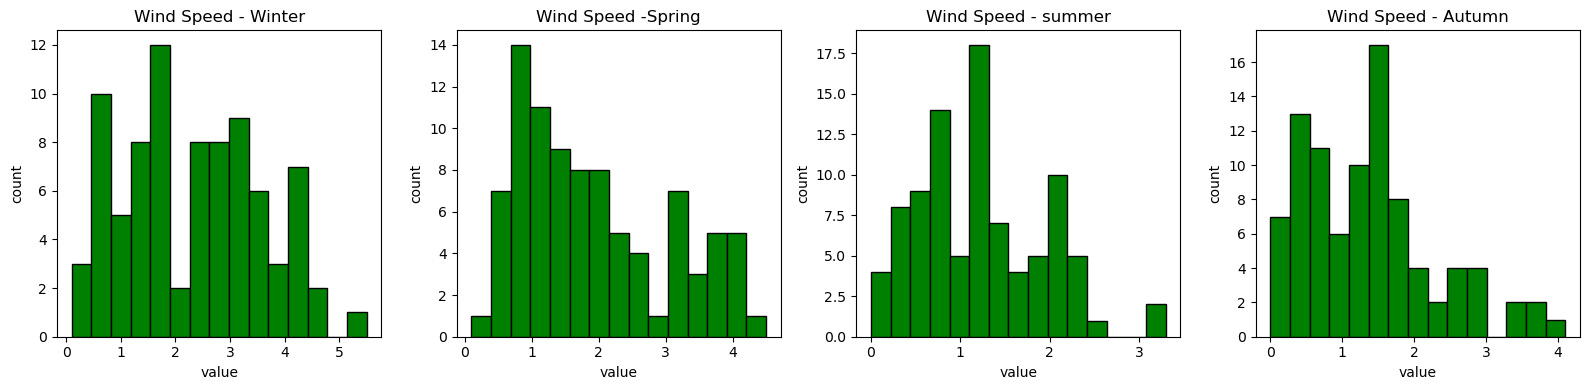

In [88]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter['wind_speed_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Wind Speed - Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring['wind_speed_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[1].set_title("Wind Speed -Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(summer['wind_speed_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[2].set_title("Wind Speed - summer")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn['wind_speed_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[3].set_title("Wind Speed - Autumn")
axis[3].set(xlabel='value', ylabel='count')

In [89]:
from scipy import stats

winter_loc, winter_scale = stats.rayleigh.fit(winter['wind_speed_m_s'])
spring_loc, spring_scale = stats.rayleigh.fit(spring['wind_speed_m_s'])
summer_loc, summer_scale = stats.rayleigh.fit(summer['wind_speed_m_s'])
autumn_loc, autumn_scale = stats.rayleigh.fit(autumn['wind_speed_m_s'])

winter_xl = np.linspace(winter['wind_speed_m_s'].min(), winter['wind_speed_m_s'].max())
spring_xl = np.linspace(spring['wind_speed_m_s'].min(), spring['wind_speed_m_s'].max())
summer_xl = np.linspace(summer['wind_speed_m_s'].min(), summer['wind_speed_m_s'].max())
autumn_xl = np.linspace(winter['wind_speed_m_s'].min(), autumn['wind_speed_m_s'].max())


# Display Results:
fig, axe = plt.subplots(1, 4)

axe[0].hist(winter['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[0].plot(winter_xl,stats.rayleigh(scale=winter_scale, loc=winter_loc).pdf(winter_xl), label="Rayleigh", color='black')
axe[0].set_title("Winter Wind Speed Distribution Fit")
axe[0].set_xlabel("Value")
axe[0].legend()
axe[0].grid()

axe[1].hist(spring['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[1].plot(spring_xl,stats.rayleigh(scale=spring_scale, loc=spring_loc).pdf(spring_xl), label="Rayleigh", color='black')
axe[1].set_title("Spring Wind Speed Distribution Fit")
axe[1].set_xlabel("Value")
axe[1].legend()
axe[1].grid()

axe[2].hist(summer['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[2].plot(summer_xl,stats.rayleigh(scale=summer_scale, loc=summer_loc).pdf(summer_xl), label="Rayleigh", color='black')
axe[2].set_title("Summer Wind Speed Distribution Fit")
axe[2].set_xlabel("Value")
axe[2].legend()
axe[2].grid()

axe[3].hist(autumn['wind_speed_m_s'],density=1, label="Real World Data", color='green')
axe[3].plot(autumn_xl,stats.rayleigh(scale=autumn_scale, loc=autumn_loc).pdf(autumn_xl), label="Rayleigh", color='black')
axe[3].set_title("Autumn Wind Speed Distribution Fit")
axe[3].set_xlabel("Value")
axe[3].legend()
axe[3].grid()


/home/sean/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:8280: RuntimeWarning: overflow encountered in divide
  s3 = (1/xm).sum()


ValueError: The data contains non-finite values.

In [ ]:
january = garden_weather[garden_weather.index.month_name().isin(['January'])].sort_index(ascending=True)


january_loc, january_scale = stats.rayleigh.fit(january['wind_speed_m_s'])

january_xl = np.linspace(january['wind_speed_m_s'].min(), january['wind_speed_m_s'].max())

plt.rcParams["figure.figsize"] = [4, 4]

fig, axe = plt.subplots(1)

axe.hist(january['wind_speed_m_s'],density=1, label="background", color='green')
axe.plot(january_xl,stats.rayleigh(scale=january_scale, loc=january_loc).pdf(january_xl), label="Rayleigh", color='black')
axe.set_title("January Wind Speed Distribution Fit")
axe.set_xlabel("Value")
axe.legend()
axe.grid()


Wind speed appears to be more widely distributed over a greater range in winter and spring than in the autumn and autumn with a higher frequency of lower speeds vs higher speeds. The appearance of the distributions is similar to "standard" bell curve, however the distribution appears to be shifted to the right which is more consistent with the characteristics of a Rayleigh distribution.

**Rayleigh Distribution** - Krishnavedala, CC0, via Wikimedia Commons
![Rayleigh Distribution Curves](images/illustrations/768px-Rayleigh_distributionPDF.svg.png "Rayleigh Distribution Curve")

To model the distribution using the Rayleigh probability distribution the mode of the variables must be known. However, firstly, the null values must be managed. The null values are located in the autumn data range. The null values can be replaced with the median values. 

In [ ]:
# identify null values
autumn.isnull().sum()

In [ ]:
# replace nan values with the median - Zach (2022). The model could be unreliable if null values are not managed (Tamboli, 2021) 
autumn = autumn.fillna(autumn.median(numeric_only=True))

# check na values
autumn.isnull().sum()

The mode of the ranges of data are required for the Rayleigh distribution.

In [ ]:
# get mode of the wind speed variables by season
winter_ws_mode = winter['wind_speed_m_s'].mode()
spring_ws_mode = spring['wind_speed_m_s'].mode()
autumn_ws_mode = autumn['wind_speed_m_s'].mode()
autumn_ws_mode = autumn['wind_speed_m_s'].mode()

print(winter_ws_mode)
print(spring_ws_mode)
print(autumn_ws_mode)
print(autumn_ws_mode)

The Raleigh distributions are generated and the histograms are plotted.

In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(2)

# draw randomly from rayleigh distributions for each season
model_ws_winter = np.random.rayleigh(winter_ws_mode[0], winter_rows)
model_ws_spring = np.random.rayleigh(spring_ws_mode[0], spring_rows)
model_ws_autumn = np.random.rayleigh(autumn_ws_mode[0], autumn_rows)
model_ws_autumn = np.random.rayleigh(autumn_ws_mode[0], autumn_rows)



plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(model_ws_winter, color = 'grey', edgecolor = 'black', bins=15)
axis[0].set_title("Wind Speed Model Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(model_ws_spring, color = 'grey', edgecolor = 'black', bins=15)
axis[1].set_title("Wind Speed Model Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(model_ws_autumn, color = 'grey', edgecolor = 'black', bins=15)
axis[2].set_title("Wind Speed Model autumn")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(model_ws_autumn, color = 'grey', edgecolor = 'black', bins=15)
axis[3].set_title("Wind Speed Model Autumn")
axis[3].set(xlabel='value', ylabel='count')

The histograms from the generated data have a similar appearance to the wind speed data in the dataset. To test the hypothesis that the Rayleigh distribution models the wind speed variable the Kernel Density Estimations (KDE) for the real world data and the modelled data can be compared. Kernel Density Estimation is the application of kernel smoothing for probability density estimation.

In [ ]:
# import seaborn in order to plot KDE
import seaborn as sns

# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(3)

# generate a range of values normally distributed with the actual data
winter_normal_wind_speed = np.random.normal(winter.describe()['wind_speed_m_s']['mean'], winter.describe()['wind_speed_m_s']['std'], size = winter_rows)

fig = plt.figure(figsize=(5,5))
sns.kdeplot(model_ws_winter)
sns.kdeplot(winter['wind_speed_m_s'])
#sns.kdeplot(winter_normal_wind_speed)
fig.legend(labels=['rayleigh model','actual data'], loc="right")

plt.title("Winter Wind Speed KDE Plots")
plt.show()


In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(3)

# generate a range of values normally distributed with the actual data
spring_normal_wind_speed = np.random.normal(spring.describe()['wind_speed_m_s']['mean'], spring.describe()['wind_speed_m_s']['std'], size = spring_rows)

fig = plt.figure(figsize=(5,5))
sns.kdeplot(model_ws_spring)
sns.kdeplot(spring['wind_speed_m_s'])
# sns.kdeplot(spring_normal_wind_speed)
fig.legend(labels=['rayleigh model','actual data', 'standard model'], loc="right")

plt.title("Spring Wind Speed KDE Plots")
plt.show()

In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(3)

# generate a range of values normally distributed with the actual data
autumn_normal_wind_speed = np.random.normal(spring.describe()['wind_speed_m_s']['mean'], spring.describe()['wind_speed_m_s']['std'], size = spring_rows)

fig = plt.figure(figsize=(5,5))
sns.kdeplot(model_ws_autumn)
sns.kdeplot(autumn['wind_speed_m_s'])
# sns.kdeplot(spring_normal_wind_speed)
fig.legend(labels=['rayleigh model','actual data', 'standard model'], loc="right")

plt.title("autumn Wind Speed KDE Plots")
plt.show()

In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(3)

# generate a range of values normally distributed with the actual data
autumn_normal_wind_speed = np.random.normal(spring.describe()['wind_speed_m_s']['mean'], spring.describe()['wind_speed_m_s']['std'], size = spring_rows)

fig = plt.figure(figsize=(5,5))
sns.kdeplot(model_ws_autumn)
sns.kdeplot(autumn['wind_speed_m_s'])
# sns.kdeplot(spring_normal_wind_speed)
fig.legend(labels=['rayleigh model','actual data', 'standard model'], loc="right")

plt.title("Autumn Wind Speed KDE Plots")
plt.show()

The overlaid KDEs are close but not exact matches. There could be a number of reasons for this possibly including that the anemometer where the data was generated is measuring some level of wind turbulence (and thus signal noise) as opposed to wind speed that is not being contaminated by turbulence. The anemometer is mounted on the roof of the author's shed. Less noisy data would be attainable if the anemometer was mounted on the roof of the author's house in a more exposed setting.  

### Gust Speed <a id="gust-speed"></a>

As the gust speed variable is a measure of woind variations over time it can be modelled in the same was as wind speed.

Histograms of the distribution of gust speeds are plotted:

In [ ]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter['gust_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Gust Speed - Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring['gust_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[1].set_title("Gust Speed -Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(autumn['gust_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[2].set_title("Gust Speed - autumn")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn['gust_m_s'], color = 'green', edgecolor = 'black', bins=15)
axis[3].set_title("Gust Speed - Autumn")
axis[3].set(xlabel='value', ylabel='count')

Plot the Raleigh distribution models:

In [ ]:
# get mode of the wind speed variables by season
winter_gust_mode = winter['gust_m_s'].mode()
spring_gust_mode = spring['gust_m_s'].mode()
autumn_gust_mode = autumn['gust_m_s'].mode()
autumn_gust_mode = autumn['gust_m_s'].mode()

In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(4)

# draw randomly from rayleigh distributions for each season
model_gust_winter = np.random.rayleigh(winter_gust_mode[0], winter_rows)
model_gust_spring = np.random.rayleigh(spring_gust_mode[0], spring_rows)
model_gust_autumn = np.random.rayleigh(autumn_gust_mode[0], autumn_rows)
model_gust_autumn = np.random.rayleigh(autumn_gust_mode[0], autumn_rows)



plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(model_gust_winter, color = 'grey', edgecolor = 'black', bins=15)
axis[0].set_title("Gust Speed Model Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(model_gust_spring, color = 'grey', edgecolor = 'black', bins=15)
axis[1].set_title("Gust Speed Model Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(model_gust_autumn, color = 'grey', edgecolor = 'black', bins=15)
axis[2].set_title("Gust Speed Model autumn")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(model_gust_autumn, color = 'grey', edgecolor = 'black', bins=15)
axis[3].set_title("Gust Speed Model Autumn")
axis[3].set(xlabel='value', ylabel='count')

Compare the KDE of the real world data and the modelled data.

In [ ]:
# import seaborn in order to plot KDE
import seaborn as sns

# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(3)

# generate a range of values normally distributed with the actual data
winter_normal_wind_speed = np.random.normal(winter.describe()['wind_speed_m_s']['mean'], winter.describe()['wind_speed_m_s']['std'], size = winter_rows)

fig = plt.figure(figsize=(5,5))
sns.kdeplot(model_gust_winter)
sns.kdeplot(winter['gust_m_s'])
#sns.kdeplot(winter_normal_wind_speed)
fig.legend(labels=['rayleigh model','actual data'], loc="right")

plt.title("Winter Gust Speed KDE Plots")
plt.show()

In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(3)

# generate a range of values normally distributed with the actual data
autumn_normal_wind_speed = np.random.normal(spring.describe()['wind_speed_m_s']['mean'], spring.describe()['wind_speed_m_s']['std'], size = spring_rows)

fig = plt.figure(figsize=(5,5))
sns.kdeplot(model_gust_spring)
sns.kdeplot(spring['gust_m_s'])
# sns.kdeplot(spring_normal_wind_speed)
fig.legend(labels=['rayleigh model','actual data', 'standard model'], loc="right")

plt.title("Spring Gust Speed KDE Plots")
plt.show()

In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(3)

# generate a range of values normally distributed with the actual data
autumn_normal_wind_speed = np.random.normal(spring.describe()['wind_speed_m_s']['mean'], spring.describe()['wind_speed_m_s']['std'], size = spring_rows)

fig = plt.figure(figsize=(5,5))
sns.kdeplot(model_gust_autumn)
sns.kdeplot(autumn['gust_m_s'])
# sns.kdeplot(spring_normal_wind_speed)
fig.legend(labels=['rayleigh model','actual data', 'standard model'], loc="right")

plt.title("autumn Gust Speed KDE Plots")
plt.show()

In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(3)

# generate a range of values normally distributed with the actual data
autumn_normal_wind_speed = np.random.normal(spring.describe()['wind_speed_m_s']['mean'], spring.describe()['wind_speed_m_s']['std'], size = spring_rows)

fig = plt.figure(figsize=(5,5))
sns.kdeplot(model_gust_autumn)
sns.kdeplot(autumn['gust_m_s'])
# sns.kdeplot(spring_normal_wind_speed)
fig.legend(labels=['rayleigh model','actual data', 'standard model'], loc="right")

plt.title("Autumn Gust Speed KDE Plots")
plt.show()

### Humidity <a id="humidity"></a>

Using Matplotlib the histogram of humidity frequency distribution can be plotted.

In [ ]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter['humidity_%'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Humidity - Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring['humidity_%'], color = 'green', edgecolor = 'black', bins=15)
axis[1].set_title("Humidity -Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(autumn['humidity_%'], color = 'green', edgecolor = 'black', bins=15)
axis[2].set_title("Humidity - autumn")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn['humidity_%'], color = 'green', edgecolor = 'black', bins=15)
axis[3].set_title("Humidity - Autumn")
axis[3].set(xlabel='value', ylabel='count')

Literature suggests that the normal distribution is the best fit distribution for relative humidity probability modelling (Musa Esıt, 2022). Musa Esıt (2022) found that the normal distribution was the best probability fit for 2 out or 3 weather stations humidity data.

*Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean* (Chen, 2021).

The standard distribution characteristic bell curve is illustrated below demonstrating that there is a 95.4% chance that a value will fall within 2 standard deviations of the mean.

**Standard Probability Distribution** - By Ainali - Own work, CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=3141713

![Normal Distribution Curve](images/illustrations/Standard_deviation_diagram_micro.svg.png "Normal Distribution Curve")

In mathematical terms the normal distribution probability density function is expressed as:

${\displaystyle f(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

where:
- $x$ = value of the variable or data being examined and $f(x)$ the probability function
- $\mu =$ the mean
- $\sigma =$ the standard deviation

The python syntax for the Gaussian distribution is:

`random.normal(loc=0.0, scale=1.0, size=None)`

- loc = mean of the distribution
- scale = standard deviation of the distribution
- size = output shape

In order to generate a sample of random normally distributed data the mean and standard deviation of the real world data are needed. Once these are known the data can be synthesised and histograms plotted.

In [ ]:
winter_normal_humidity = np.random.normal(winter.describe()['humidity_%']['mean'], winter.describe()['humidity_%']['std'], size = winter_rows)
spring_normal_humidity = np.random.normal(spring.describe()['humidity_%']['mean'], spring.describe()['humidity_%']['std'], size = spring_rows)
autumn_normal_humidity = np.random.normal(autumn.describe()['humidity_%']['mean'], autumn.describe()['humidity_%']['std'], size = autumn_rows)
autumn_normal_humidity = np.random.normal(autumn.describe()['humidity_%']['mean'], autumn.describe()['humidity_%']['std'], size = autumn_rows)


In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(4)

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter_normal_humidity, color = 'grey', edgecolor = 'black', bins=15)
axis[0].set_title("Winter Humidity Model")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring_normal_humidity, color = 'grey', edgecolor = 'black', bins=15)
axis[1].set_title("Spring Humidity Model")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(autumn_normal_humidity, color = 'grey', edgecolor = 'black', bins=15)
axis[2].set_title("autumn Humidity Model")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn_normal_humidity, color = 'grey', edgecolor = 'black', bins=15)
axis[3].set_title("Autumn Humidity Model")
axis[3].set(xlabel='value', ylabel='count')

Using python it is possible to define a function for the probability density function (PDF) for the normal distribution.

In [ ]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

The normal distribution PDF for real world dataset and can be plotted and compared against the KDE of the randomly generated winter humidity dataset.

In [ ]:
import numpy as np

x_axis_values = np.linspace(winter.describe()['humidity_%']['min'], (winter.describe()['humidity_%']['max'], winter_rows))

pdf = normal_dist(x_axis_values ,winter.describe()['humidity_%']['mean'] , winter.describe()['humidity_%']['std'])
 

plt.rcParams['figure.figsize'] = (7,5)

# plt.plot(x_axis_values, pdf, color = 'red')
# sns.histplot(winter_normal_humidity, kde=True, color = 'grey')
# sns.histplot(winter['humidity_%'], kde=True)
sns.kdeplot(winter['humidity_%'])
sns.kdeplot(winter_normal_humidity)
plt.xlabel('Data points')
plt.ylabel('Probability Density')
plt.legend(labels=['Humidity KDE', 'Humidity KDE'])
plt.title('Normal Distribution KDE and Simulated Distribution KDE')
plt.show()

The KDE curves for the real world humidity data and the modelled humidity data are similar in appearance.

### Chill <a id="chill"></a>

Wind chill is said to have a quasi-normal probability distribution  **ref


In [ ]:
plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[0].set_title("Wind Chill - Winter")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[1].set_title("Wind Chill -Spring")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(autumn['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[2].set_title("Wind Chill - autumn")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn['chill_celsius'], color = 'green', edgecolor = 'black', bins=15)
axis[3].set_title("Wind Chill - Autumn")
axis[3].set(xlabel='value', ylabel='count')


In [ ]:
winter_normal_chill = np.random.normal(winter.describe()['chill_celsius']['mean'], winter.describe()['chill_celsius']['std'], size = winter_rows)
spring_normal_chill = np.random.normal(spring.describe()['chill_celsius']['mean'], spring.describe()['chill_celsius']['std'], size = spring_rows)
autumn_normal_chill = np.random.normal(autumn.describe()['chill_celsius']['mean'], autumn.describe()['chill_celsius']['std'], size = autumn_rows)
autumn_normal_chill = np.random.normal(autumn.describe()['chill_celsius']['mean'], autumn.describe()['chill_celsius']['std'], size = autumn_rows)


In [ ]:
# seeding so the random numbers generated don't change when code is run, for demonstrative purposes
seed = np.random.seed(4)

plt.rcParams["figure.figsize"] = [16, 4]
plt.rcParams["figure.autolayout"] = True

fig, axis = plt.subplots(1, 4)
axis[0].hist(winter_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[0].set_title("Winter Chill Model")
axis[0].set(xlabel='value', ylabel='count')
axis[1].hist(spring_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[1].set_title("Spring Chill Model")
axis[1].set(xlabel='value', ylabel='count')
axis[2].hist(autumn_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[2].set_title("autumn Chill Model")
axis[2].set(xlabel='value', ylabel='count')
axis[3].hist(autumn_normal_chill, color = 'grey', edgecolor = 'black', bins=15)
axis[3].set_title("Autumn Chill Model")
axis[3].set(xlabel='value', ylabel='count')

In [ ]:

# https://stackoverflow.com/questions/63895392/seaborn-is-not-plotting-within-defined-subplots
fig, (ax1, ax2) = plt.subplots(1,2)
sns.histplot(winter['chill_celsius'], kde=True, ax=ax1)
sns.histplot(winter_normal_chill, kde=True, ax=ax2)
plt.show()

## Modelled Dataset <a id="modelled-dataset"></a>

Using the `pd.date_range()` method the time_series from the real world dataset can be created.

In [ ]:
# adapted from - https://pandas.pydata.org/docs/reference/api/pandas.date_range.html [Accessed 13 Nov. 2023].
dti = pd.date_range(start="2022-11-09", end='2023-10-31')


A new Pandas DataFrame is created and the generated time series is set as the index.

In [ ]:
# Code adapted from - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html [Accessed 13 Nov. 2023].
synthesised_dataset = pd.DataFrame(index=dti, columns = column_rename)
print(synthesised_dataset)

Concatenate the seasonal data for each variable into to one array and assign a variable for the array that corresponds to the modelled variable.

In [ ]:

# code adapted from - https://sparkbyexamples.com/python/numpy-concatenate-arrays/ [Accessed 13 Nov. 2023]
wind_speed_model = np.concatenate((model_ws_winter, model_ws_spring, model_gust_autumn, model_ws_autumn))
gust_speed_model = np.concatenate((model_gust_winter, model_gust_spring, model_gust_autumn, model_gust_autumn))
humidity_model = np.concatenate((winter_normal_humidity, spring_normal_humidity, autumn_normal_humidity, autumn_normal_humidity))

Assign the modelled data to a column in the sythesised DataFrame.

In [ ]:
synthesised_dataset['wind_speed_m_s'] = wind_speed_model
synthesised_dataset['gust_m_s'] = gust_speed_model
synthesised_dataset['humidity_%'] = humidity_model
#print(type(synthesised_dataset))
print(synthesised_dataset)
#print(synthesised_dataset.info())

## Correlation <a id="correlation"></a>

In [ ]:
corr_variable = garden_weather.iloc[0:, 1:].corr()
corr_variable


In [ ]:
# garden_pivot = garden_weather.pivot(index='date_time', columns='wind_speed_m_s')
sns.heatmap(corr_variable)

## References <a id="references"></a>

Bhandari, P. (2020). Levels of Measurement | Nominal, Ordinal, Interval and Ratio. [online] Scribbr. Available at: https://www.scribbr.com/statistics/levels-of-measurement/. [Accessed 7 Nov. 2023].

Chartio. (n.d.). How to Check If Any Value is NaN in a Pandas DataFrame. [online] Available at: https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/. [Accessed 7 Nov. 2023].

Chen, J. (2021). Normal Distribution. [online] Investopedia. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp. [Accessed 10 Nov. 2023].

docs.python.org. (n.d.). 15. Floating Point Arithmetic: Issues and Limitations — Python 3.10.1 documentation. [online] Available at: https://docs.python.org/3/tutorial/floatingpoint.html. [Accessed 7 Nov. 2023].

GeeksforGeeks. (2018). How to rename columns in Pandas DataFrame. [online] Available at: https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/. [Accessed 7 Nov. 2023].

H, S. (2023). head () and tail () Functions Explained with Examples and Codes. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2023/07/head-and-tail-functions/. [Accessed 7 Nov. 2023].

Kumar, S. (2021). Deep Dive Analysis of Missing Values in Dataset. [online] Medium. Available at: https://towardsdatascience.com/deep-dive-analysis-of-missing-values-in-dataset-b387d9de6d4b. [Accessed 7 Nov. 2023].

Malli (2022). How To Concatenate NumPy Arrays. [online] Spark By {Examples}. Available at: https://sparkbyexamples.com/python/numpy-concatenate-arrays/. [Accessed 13 Nov. 2023].

Moffitt, C. (2018). Overview of Pandas Data Types - Practical Business Python. [online] pbpython.com. Available at: https://pbpython.com/pandas_dtypes.html. [Accessed 6 Nov. 2023].

Musa Esıt (2022). The Determination of the Most Appropriate Probability Distribution Models for the Meteorological Variables. Bitlis Eren üniversitesi fen bilimleri dergisi, 11(4), pp.1026–1041. doi:https://doi.org/10.17798/bitlisfen.1168077. [Accessed 10 Nov. 2023].

Name, Y. (2022). Pandas filter dates by month, hour, day and last N days & weeks. [online] kanoki. Available at: https://kanoki.org/2022/07/16/pandas-filter-dates-by-month-hour-day-or-last-n-days-weeks/ [Accessed 9 Nov. 2023].

numpy.org. (n.d.). numpy.random.Generator.rayleigh — NumPy v1.26 Manual. [online] Available at: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.rayleigh.html#numpy.random.Generator.rayleigh [Accessed 10 Nov. 2023].

pandas.pydata.org. (2023). pandas.DataFrame — pandas 1.2.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html. [Accessed 13 Nov. 2023].

pandas.pydata.org. (n.d.). Time series / date functionality — pandas 1.2.3 documentation. [online] Available at: https://pandas.pydata.org/docs/user_guide/timeseries.html. [Accessed 13 Nov. 2023].

Paraschiv, L.-S., Paraschiv, S. and Ion, I.V. (2019). Investigation of wind power density distribution using Rayleigh probability density function. Energy Procedia, 157, pp.1546–1552. doi:https://doi.org/10.1016/j.egypro.2018.11.320. [Accesed 10 Nov. 2023].

Sharma, R. (2020). 4 Types of Data: Nominal, Ordinal, Discrete, Continuous. [online] upGrad blog. Available at: https://www.upgrad.com/blog/types-of-data/. [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). How do I properly set the Datetimeindex for a Pandas datetime object in a dataframe? [online] Available at: https://stackoverflow.com/questions/27032052/how-do-i-properly-set-the-datetimeindex-for-a-pandas-datetime-object-in-a-datafr [Accessed 7 Nov. 2023].

Tamboli, N. (2021). Tackling Missing Value in Dataset. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/. [Accessed 7 Nov. 2023].

Treadwell, M. (2014). Tableau Pills: Continuous and Discrete Data Roles. [online] InterWorks. Available at: https://interworks.com/blog/mtreadwell/2014/02/19/tableau-pills-continuous-and-discrete-data-roles/ [Accessed 7 Nov. 2023].

Walker, J. (2019). Tutorial: Time Series Analysis with Pandas – Dataquest. [online] Dataquest. Available at: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/. [Accessed 7 Nov. 2023].

Wikipedia Contributors (2019). Probability distribution. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Probability_distribution. [Accessed 8 Nov. 2023].

Wikipedia Contributors (2023). Irish calendar. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Irish_calendar [Accessed 9 Nov. 2023].

www.javatpoint.com. (n.d.). Pandas DataFrame.describe() - javatpoint. [online] Available at: https://www.javatpoint.com/pandas-dataframe-describe. [Accessed 8 Nov. 2023].

www.w3schools.com. (n.d.). Pandas DataFrame info() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_info.asp. [Accessed 7 Nov. 2023].

Zach (2021). How to Find Duplicates in Pandas DataFrame (With Examples). [online] Statology. Available at: https://www.statology.org/pandas-find-duplicates/. [Accessed 3 Nov. 2023].

## Associated Reading <a id="associated-reading"></a>

Flom, P. (2019). Are dates nominal, ordinal, interval or ratio? [online] Medium. Available at: https://medium.com/@peterflom/are-dates-nominal-ordinal-interval-or-ratio-ef567e10884 [Accessed 7 Nov. 2023].

Matplotlib (2012). Matplotlib: Python plotting — Matplotlib 3.1.1 documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/. [Accessed 8 Nov 2023].

numpy.org. (n.d.). Overview — NumPy v1.21 Manual. [online] Available at: https://numpy.org/doc/stable/index.html. [Accessed 8 Nov. 2023].

Pandas (2018). Python Data Analysis Library — pandas: Python Data Analysis Library. [online] Pydata.org. Available at: https://pandas.pydata.org/. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). API reference — pandas 1.1.4 documentation. [online] Available at: https://pandas.pydata.org/docs/reference/index.html. [Accessed 03 Nov. 2023].

pandas.pydata.org. (n.d.). How to handle time series data with ease — pandas 2.1.2 documentation. [online] Available at: https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html [Accessed 7 Nov. 2023].

Stack Overflow. (n.d.). The real difference between float32 and float64. [online] Available at: https://stackoverflow.com/questions/43440821/the-real-difference-between-float32-and-float64 [Accessed 7 Nov. 2023].

---

*Notebook Ends*